XRAY Images 512x512 Pix

# Start with necessary imports

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
import keras
from keras import backend as K
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import PIL
import cv2
import os


# Fetch the XRay Dataset

699 Normal. 709 Pneumonia. 699 Tb.

In [2]:
path_normal = './Datasets/Normal/'
path_pneumonia = './Datasets/pneumonia/'
path_tb = './Datasets/Tuberculosis/'

In [3]:
data1 = list()
data2 = list()
data3 = list()
x = list()

In [4]:
##Class-1 images##

for image in os.walk(path_normal):
  data1.append(image[2])

for i in range(len(data1[0])): #data1 is a list containing a list of file names. so, data1[0] is list of file names.
  str_complete = path_normal + data1[0][i]
  img = cv2.imread(str_complete) #It loads the image as a NumPy array.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128, 128))
  x.append(img)
  # print(i)

print(f"{len(x)} Images Loaded")

700 Images Loaded


In [5]:
##Class-2 images##
for image in os.walk(path_pneumonia):
  data2.append(image[2])

for i in range(len(data2[0])):
  str_complete = path_pneumonia + data2[0][i]
  img = cv2.imread(str_complete)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128, 128))
  x.append(img)#Ensure all images are loaded
  # print(i)
print(f"{len(x)} Images Loaded")

1410 Images Loaded


In [6]:
##Class-3 images##
for image in os.walk(path_tb):
  data3.append(image[2])

for i in range(len(data3[0])):
  str_complete = path_tb + data3[0][i]
  img = cv2.imread(str_complete)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128, 128))
  x.append(img)
  # print(i)##Ensure all images are loaded
print(f"{len(x)} Images Loaded")

2110 Images Loaded


In [7]:
data_x = np.asarray(x) #x is a list of images. this converts it to a numpy array of images. where each image is a numpy array

In [8]:
data_x.shape

(2110, 128, 128)

In [9]:
x = data_x

In [10]:
y = np.zeros(2110)
y[:700] =1
y[700:1410]=2
y[1410:2110]=3

In [11]:
print(data_x.shape,y.shape)

(2110, 128, 128) (2110,)


In [12]:
##Dataset Split##
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2, random_state=1)#x_train has 80%, x_test has 20%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=1)#x_train has 70%, x_val has 10%

#one-hot encoding
y_tr_one_hot  = np.zeros((np.array(y_train).shape[0],3))

for i in range(np.array(y_train).shape[0]):
  label = y_train[i]-1
  y_tr_one_hot[i][int(label)] = 1

y_val_one_hot  = np.zeros((np.array(y_val).shape[0],3))

for i in range(np.array(y_val).shape[0]):
  label = y_val[i]-1
  y_val_one_hot[i][int(label)] = 1

y_te_one_hot  = np.zeros((np.array(y_test).shape[0],3))

for i in range(np.array(y_test).shape[0]):
  label = y_test[i]-1
  y_te_one_hot[i][int(label)] = 1

#Reshape xtrain

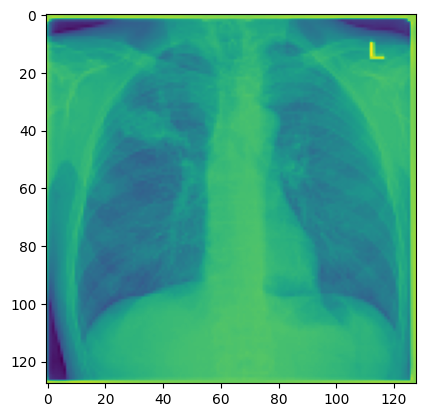

(128, 128)
(1477,)
(1477, 128, 128)
[[210 210 210 ... 210 210 208]
 [213 214 221 ... 210 213 213]
 [221 169 107 ... 204 212 211]
 ...
 [120  60  52 ... 122 211 206]
 [148  62  55 ... 128 219 206]
 [219 220 217 ... 214 209 207]]


In [13]:
import random
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx])
plt.show()
print(x_train[idx].shape)
print(y_train.shape)
print(x_train.shape)
print(x_train[idx])

In [14]:
print(y_tr_one_hot.shape)
print(x_train.shape)

(1477, 3)
(1477, 128, 128)


In [15]:
train_size = x_train.shape[0]
input_shape = x_train[0].shape
n_classes = 3
print(input_shape)

(128, 128)


In [16]:
batch_size = 64

In [17]:
# Create a tuple containing the two tensors
train_data = (x_train, y_tr_one_hot)

In [18]:
# Assuming train_data is a tuple or a NumPy array
# Convert it to a tf.data.Dataset
train_data = tf.data.Dataset.from_tensor_slices(train_data)

# Shuffle the dataset
train_data = train_data.shuffle(buffer_size=128).batch(batch_size)

2023-09-11 17:37:30.938935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
for example in train_data.take(1):
    break
print("X train batch shape = {}, Y train batch shape = {} ".format(example[0].shape, example[1].shape))

X train batch shape = (64, 128, 128), Y train batch shape = (64, 3) 


In [20]:
val_data = (x_val, y_val_one_hot)
val_data = tf.data.Dataset.from_tensor_slices(val_data)
val_data = val_data.shuffle(buffer_size=128).batch(batch_size)

In [21]:
#Save the test data in numpy file.
print(x_train.shape)
print(y_train.shape)
print(type(x_train))
np.save('y_test.npy', y_test)
np.save('x_test.npy', x_test)

(1477, 128, 128)
(1477,)
<class 'numpy.ndarray'>


# Defining the model

We then need to define a model. For the lowest possible latency, each layer should have a maximum number of trainable parameters of 4096. This is due to fixed limits in the Vivado compiler, beyond which maximally unrolled (=parallel) compilation will fail. This will allow us to use strategy = 'latency' in the hls4ml part, rather than strategy = 'resource', in turn resulting in lower latency.

In [52]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Model

filters_per_conv_layer = [4, 8, 8]
neurons_per_dense_layer = [8, 16]

x = x_in = Input((128,128,1))

for i, f in enumerate(filters_per_conv_layer):
    print(('Adding convolutional block {} with N={} filters').format(i, f))
    x = Conv2D(
        int(f),
        kernel_size=(3, 3),
        strides=(1, 1),
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
        use_bias=False,
        name='conv_{}'.format(i),
    )(x)
    x = BatchNormalization(name='bn_conv_{}'.format(i))(x)
    x = Activation('relu', name='conv_act_%i' % i)(x)
    x = MaxPooling2D(pool_size=(3, 3), name='pool_{}'.format(i))(x)
x = Flatten()(x)

for i, n in enumerate(neurons_per_dense_layer):
    print(('Adding dense block {} with N={} neurons').format(i, n))
    x = Dense(n, kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), name='dense_%i' % i, use_bias=False)(x)
    x = BatchNormalization(name='bn_dense_{}'.format(i))(x)
    x = Activation('relu', name='dense_act_%i' % i)(x)
x = Dense(int(n_classes), name='output_dense')(x)
x_out = Activation('softmax', name='output_softmax')(x)

model = Model(inputs=[x_in], outputs=[x_out], name='keras_baseline')

model.summary()

Adding convolutional block 0 with N=4 filters
Adding convolutional block 1 with N=8 filters
Adding convolutional block 2 with N=8 filters
Adding dense block 0 with N=8 neurons
Adding dense block 1 with N=16 neurons
Model: "keras_baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv_0 (Conv2D)             (None, 126, 126, 4)       36        
                                                                 
 bn_conv_0 (BatchNormalizati  (None, 126, 126, 4)      16        
 on)                                                             
                                                                 
 conv_act_0 (Activation)     (None, 126, 126, 4)       0         
                                                                 
 pool_0 (MaxPooling2D)       (None,

In [53]:
for layer in model.layers:
    if layer.__class__.__name__ in ['Conv2D', 'Dense']:
        w = layer.get_weights()[0]
        layersize = np.prod(w.shape)
        print("{}: {}".format(layer.name, layersize))  # 0 = weights, 1 = biases
        if layersize > 4096:  # assuming that shape[0] is batch, i.e., 'None'
            print("Layer {} is too large ({}), are you sure you want to train?".format(layer.name, layersize))

conv_0: 36
conv_1: 288
conv_2: 576
dense_0: 576
dense_1: 128
output_dense: 48


Looks good! It's below the Vivado-enforced unroll limit of 4096.

# Prune dense and convolutional layers

We know pruning can be done at no accuracy cost, let's prune the convolutional and dense layers to 50% sparsity, skipping the output layer.

In [55]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_callbacks

NSTEPS = int(train_size * 0.9) // batch_size  # 90% train, 10% validation in 10-fold cross validation
print('Number of training steps per epoch is {}'.format(NSTEPS))


# Prune all convolutional and dense layers gradually from 0 to 50% sparsity every 2 epochs,
# ending by the 10th epoch
def pruneFunction(layer):
    pruning_params = {
        'pruning_schedule': sparsity.PolynomialDecay(
            initial_sparsity=0.0, final_sparsity=0.50, begin_step=NSTEPS * 2, end_step=NSTEPS * 10, frequency=NSTEPS
        )
    }
    if isinstance(layer, tf.keras.layers.Conv2D):
        return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)
    if isinstance(layer, tf.keras.layers.Dense) and layer.name != 'output_dense':
        return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)
    return layer


model_pruned = tf.keras.models.clone_model(model, clone_function=pruneFunction)

Number of training steps per epoch is 20


# Train baseline

We're now ready to train the model! We defined the batch size and n epochs above. We won't use callbacks that store the best weights only, since this might select a weight configuration that has not yet reached 50% sparsity.

In [210]:
train = True  # True if you want to retrain, false if you want to load a previsously trained model

n_epochs = 30

if train:
    LOSS = tf.keras.losses.CategoricalCrossentropy()
    OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=3e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

    model_pruned.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=["accuracy"])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        pruning_callbacks.UpdatePruningStep(),
    ]

    start = time.time()
    model_pruned.fit(train_data, epochs=n_epochs, validation_data=val_data, callbacks=callbacks)
    end = time.time()

    print('It took {} minutes to train Keras model'.format((end - start) / 60.0))

    model_pruned.save('./xray_pruned_cnn.h5')

else:
    from qkeras.utils import _add_supported_quantized_objects
    from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper

    co = {}
    _add_supported_quantized_objects(co)
    co['PruneLowMagnitude'] = pruning_wrapper.PruneLowMagnitude
    model_pruned = tf.keras.models.load_model('pruned_cnn_model.h5', custom_objects=co)

Epoch 1/30
24/24 [==============================] - 3s 59ms/step - loss: 0.1213 - accuracy: 0.9729 - val_loss: 0.2046 - val_accuracy: 0.9289 - lr: 0.0030
Epoch 2/30
24/24 [==============================] - 1s 54ms/step - loss: 0.1197 - accuracy: 0.9661 - val_loss: 0.1813 - val_accuracy: 0.9384 - lr: 0.0030
Epoch 3/30
24/24 [==============================] - 1s 53ms/step - loss: 0.0955 - accuracy: 0.9770 - val_loss: 0.1574 - val_accuracy: 0.9384 - lr: 0.0030
Epoch 4/30
24/24 [==============================] - 1s 54ms/step - loss: 0.0994 - accuracy: 0.9722 - val_loss: 0.2000 - val_accuracy: 0.9336 - lr: 0.0030
Epoch 5/30
24/24 [==============================] - 1s 54ms/step - loss: 0.1191 - accuracy: 0.9628 - val_loss: 0.3386 - val_accuracy: 0.9005 - lr: 0.0030
Epoch 6/30
23/24 [===========================>..] - ETA: 0s - loss: 0.1192 - accuracy: 0.9620
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.001500000013038516.
24/24 [==============================] - 1s 54ms/step - loss:

# Quantization + fused Conv2D+BatchNormalization layer-QKeras

Let's now create a pruned an quantized model using QKeras. For this, we will use a fused Convolutional and BatchNormalization (BN) layer from QKeras, which will further speed up the implementation when we implement the model using hls4ml. There is currently no fused Dense+BatchNoralization layer available in QKeras, so we'll use Keras BatchNormalization when BN follows a Dense layer for now. We'll use the same precision everywhere, namely a bit width of 8 and 0 integer bits (this will be implemented as<8,1> in hls4ml, due to the missing sign-bit). For now, make sure to set use_bias=True in QConv2DBatchnorm to avoid problems during synthesis.


In [211]:
from qkeras import QActivation
from qkeras import QDense, QConv2DBatchnorm

x = x_in = Input((128,128,1))

for i, f in enumerate(filters_per_conv_layer):
    print(('Adding fused QConv+BN block {} with N={} filters').format(i, f))
    x = QConv2DBatchnorm(
        int(f),
        kernel_size=(3, 3),
        strides=(1, 1),
        kernel_quantizer="quantized_bits(8,0,alpha=1)",
        bias_quantizer="quantized_bits(8,0,alpha=1)",
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
        use_bias=True,
        name='fused_convbn_{}'.format(i),
    )(x)
    x = QActivation('quantized_relu(8)', name='conv_act_%i' % i)(x)
    x = MaxPooling2D(pool_size=(3, 3), name='pool_{}'.format(i))(x)
x = Flatten()(x)

for i, n in enumerate(neurons_per_dense_layer):
    print(('Adding QDense block {} with N={} neurons').format(i, n))
    x = QDense(
        n,
        kernel_quantizer="quantized_bits(8,0,alpha=1)",
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
        name='dense_%i' % i,
        use_bias=False,
    )(x)
    x = BatchNormalization(name='bn_dense_{}'.format(i))(x)
    x = QActivation('quantized_relu(8)', name='dense_act_%i' % i)(x)
x = Dense(int(n_classes), name='output_dense')(x)
x_out = Activation('softmax', name='output_softmax')(x)
qmodel = Model(inputs=[x_in], outputs=[x_out], name='qkeras')

qmodel.summary()

Adding fused QConv+BN block 0 with N=4 filters
Adding fused QConv+BN block 1 with N=8 filters
Adding fused QConv+BN block 2 with N=8 filters
Adding QDense block 0 with N=8 neurons
Adding QDense block 1 with N=16 neurons
Model: "qkeras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 fused_convbn_0 (QConv2DBatc  (None, 126, 126, 4)      57        
 hnorm)                                                          
                                                                 
 conv_act_0 (QActivation)    (None, 126, 126, 4)       0         
                                                                 
 pool_0 (MaxPooling2D)       (None, 42, 42, 4)         0         
                                                                 
 fused_convbn_1 (QConv2DBatc  (None, 4

In [212]:
# Print the quantized layers
from qkeras.autoqkeras.utils import print_qmodel_summary

print_qmodel_summary(qmodel)

fused_convbn_0       f=4 quantized_bits(8,0,0,alpha=1) quantized_bits(8,0,0,alpha=1) 
conv_act_0           quantized_relu(8)
fused_convbn_1       f=8 quantized_bits(8,0,0,alpha=1) quantized_bits(8,0,0,alpha=1) 
conv_act_1           quantized_relu(8)
fused_convbn_2       f=8 quantized_bits(8,0,0,alpha=1) quantized_bits(8,0,0,alpha=1) 
conv_act_2           quantized_relu(8)
dense_0              u=8 quantized_bits(8,0,0,alpha=1) 
bn_dense_0           is normal keras bn layer
dense_act_0          quantized_relu(8)
dense_1              u=16 quantized_bits(8,0,0,alpha=1) 
bn_dense_1           is normal keras bn layer
dense_act_1          quantized_relu(8)



You see that a bias quantizer is defined, although we are not using a bias term for the layers. This is set automatically by QKeras. In addition, you'll note that alpha='1'. This sets the weight scale per channel to 1 (no scaling). The default is alpha='auto_po2', which sets the weight scale per channel to be a power-of-2, such that an actual hardware implementation can be performed by just shifting the result of the convolutional/dense layer to the right or left by checking the sign of the scale and then taking the log2 of the scale.

Let's now prune and train this model! If you want, you can also train the unpruned version, "qmodel" and see how the performance compares. We will stick to the pruned one here. Again, we do not use a model checkpoint which stores the best weights, in order to ensure the model is trained to the desired sparsity.

In [213]:
qmodel_pruned = tf.keras.models.clone_model(qmodel, clone_function=pruneFunction)

In [214]:
train = True

n_epochs = 50
if train:
    LOSS = tf.keras.losses.CategoricalCrossentropy()
    OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=3e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)
    qmodel_pruned.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=["accuracy"])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        pruning_callbacks.UpdatePruningStep(),
    ]

    start = time.time()
    history = qmodel_pruned.fit(train_data, epochs=n_epochs, validation_data=val_data, callbacks=callbacks, verbose=1)
    end = time.time()
    print('\n It took {} minutes to train!\n'.format((end - start) / 60.0))

    qmodel_pruned.save('./xray_quant_pruned_cnn.h5')

else:
    from qkeras.utils import _add_supported_quantized_objects
    from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper

    co = {}
    _add_supported_quantized_objects(co)
    co['PruneLowMagnitude'] = pruning_wrapper.PruneLowMagnitude
    qmodel_pruned = tf.keras.models.load_model('./xray_quant_pruned_cnn.h5', custom_objects=co)

Epoch 1/50
24/24 [==============================] - 4s 97ms/step - loss: 0.9720 - accuracy: 0.5647 - val_loss: 1.1219 - val_accuracy: 0.3081 - lr: 0.0030
Epoch 2/50
24/24 [==============================] - 2s 84ms/step - loss: 0.6798 - accuracy: 0.7637 - val_loss: 1.1082 - val_accuracy: 0.3412 - lr: 0.0030
Epoch 3/50
24/24 [==============================] - 2s 85ms/step - loss: 0.5723 - accuracy: 0.8057 - val_loss: 1.0015 - val_accuracy: 0.5545 - lr: 0.0030
Epoch 4/50
24/24 [==============================] - 2s 84ms/step - loss: 0.5289 - accuracy: 0.8186 - val_loss: 0.9134 - val_accuracy: 0.5024 - lr: 0.0030
Epoch 5/50
24/24 [==============================] - 2s 84ms/step - loss: 0.4962 - accuracy: 0.8213 - val_loss: 0.6973 - val_accuracy: 0.7156 - lr: 0.0030
Epoch 6/50
24/24 [==============================] - 2s 85ms/step - loss: 0.4170 - accuracy: 0.8558 - val_loss: 0.9737 - val_accuracy: 0.5024 - lr: 0.0030
Epoch 7/50
24/24 [==============================] - 2s 85ms/step - loss: 0.3

We note that training a model quantization aware, takes around twice as long as when not quantizing during training! The validation accuracy is very similar to that of the floating point model equivalent, despite containing significantly less information. but: we are seeing a very huge loss with custom quantization rn :(

# Performance

Let's look at some ROC curves to compare the performance. Lets choose a few numbers so it doesn't get confusing. Feel free to change the numbers in labels.

In [227]:
predict_baseline = model_prune.predict(x_test)
test_score_baseline = model_pruned.evaluate(x_test, y_te_one_hot)

predict_qkeras = qmodel_pruned.predict(x_test)
test_score_qkeras = qmodel_pruned.evaluate(x_test, y_te_one_hot)

print('Keras accuracy = {} , QKeras 8-bit accuracy = {}'.format(test_score_baseline[1], test_score_qkeras[1]))

14/14 [==============================] - 0s 5ms/step


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Plotting ROC for labels ['0', '1', '2']


/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

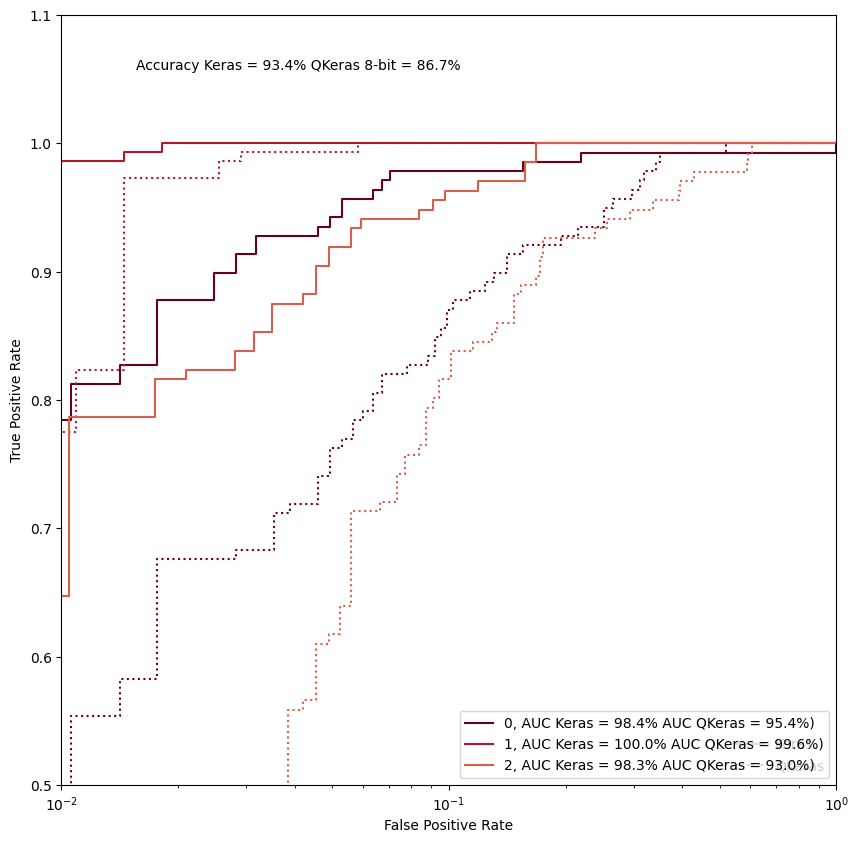

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics


labels = ['%i' % nr for nr in range(0, n_classes)]  # If you want to look at all the labels
# labels = ['0','1','2'] for all the classes
print('Plotting ROC for labels {}'.format(labels))

df = pd.DataFrame()
df_q = pd.DataFrame()
fpr = {}
tpr = {}
auc1 = {}
fpr_q = {}
tpr_q = {}
auc1_q = {}
%matplotlib inline
colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac', '#053061']
fig, ax = plt.subplots(figsize=(10, 10))
for i, label in enumerate(labels):
    df[label] = y_te_one_hot[:, int(label)]
    df[label + '_pred'] = predict_baseline[:, int(label)]
    fpr[label], tpr[label], threshold = metrics.roc_curve(df[label], df[label + '_pred'])
    auc1[label] = metrics.auc(fpr[label], tpr[label])

    df_q[label] = y_te_one_hot[:, int(label)]
    df_q[label + '_pred'] = predict_qkeras[:, int(label)]
    fpr_q[label], tpr_q[label], threshold_q = metrics.roc_curve(df_q[label], df_q[label + '_pred'])
    auc1_q[label] = metrics.auc(fpr_q[label], tpr_q[label])
    plt.plot(
        fpr[label],
        tpr[label],
        label=r'{}, AUC Keras = {:.1f}% AUC QKeras = {:.1f}%)'.format(label, auc1[label] * 100, auc1_q[label] * 100),
        linewidth=1.5,
        c=colors[i],
        linestyle='solid',
    )
    plt.plot(fpr_q[label], tpr_q[label], linewidth=1.5, c=colors[i], linestyle='dotted')

plt.semilogx()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(0.01, 1.0)
plt.ylim(0.5, 1.1)
plt.legend(loc='lower right')
plt.figtext(
    0.2,
    0.83,
    r'Accuracy Keras = {:.1f}% QKeras 8-bit = {:.1f}%'.format(test_score_baseline[1] * 100, test_score_qkeras[1] * 100),
    wrap=True,
    horizontalalignment='left',
    verticalalignment='center',
)
from matplotlib.lines import Line2D

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['Keras', 'QKeras'], loc='lower right', frameon=False)
ax.add_artist(leg)

The difference in AUC between the fp32 Keras model and the 8-bit QKeras model, is small, as we have seen for the previous examples. You can find a bonus exercise below, Bonus: Automatic quantization, where we'll use AutoQKeras to find the best heterogeneously quantized model, given a set of resource and accuracy constriants.

# Check sparsity

Let's also check the per-layer sparsity:

Layer prune_low_magnitude_conv_0: % of zeros = 0.5
Layer bn_conv_0: % of zeros = 0.0
Layer prune_low_magnitude_conv_1: % of zeros = 0.5
Layer bn_conv_1: % of zeros = 0.0
Layer prune_low_magnitude_conv_2: % of zeros = 0.5
Layer bn_conv_2: % of zeros = 0.0
Layer prune_low_magnitude_dense_0: % of zeros = 0.5
Layer bn_dense_0: % of zeros = 0.0
Layer prune_low_magnitude_dense_1: % of zeros = 0.5
Layer bn_dense_1: % of zeros = 0.0
Layer output_dense: % of zeros = 0.0
Layer prune_low_magnitude_fused_convbn_0: % of zeros = 0.5
Layer prune_low_magnitude_fused_convbn_1: % of zeros = 0.5
Layer prune_low_magnitude_fused_convbn_2: % of zeros = 0.5
Layer prune_low_magnitude_dense_0: % of zeros = 0.5
Layer bn_dense_0: % of zeros = 0.0
Layer prune_low_magnitude_dense_1: % of zeros = 0.5
Layer bn_dense_1: % of zeros = 0.0
Layer output_dense: % of zeros = 0.0


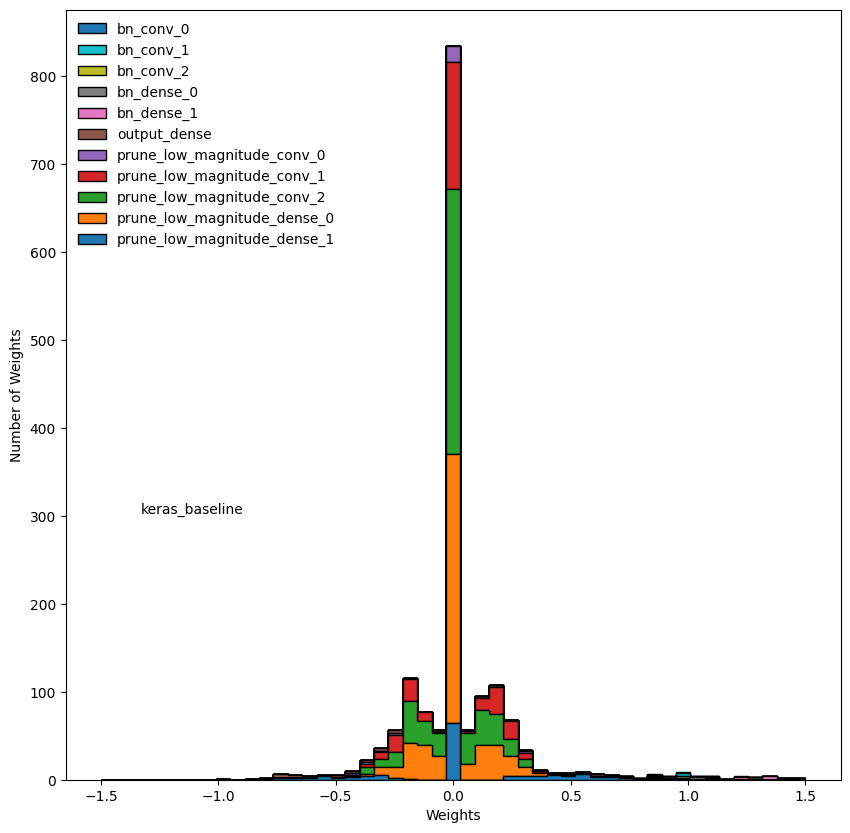

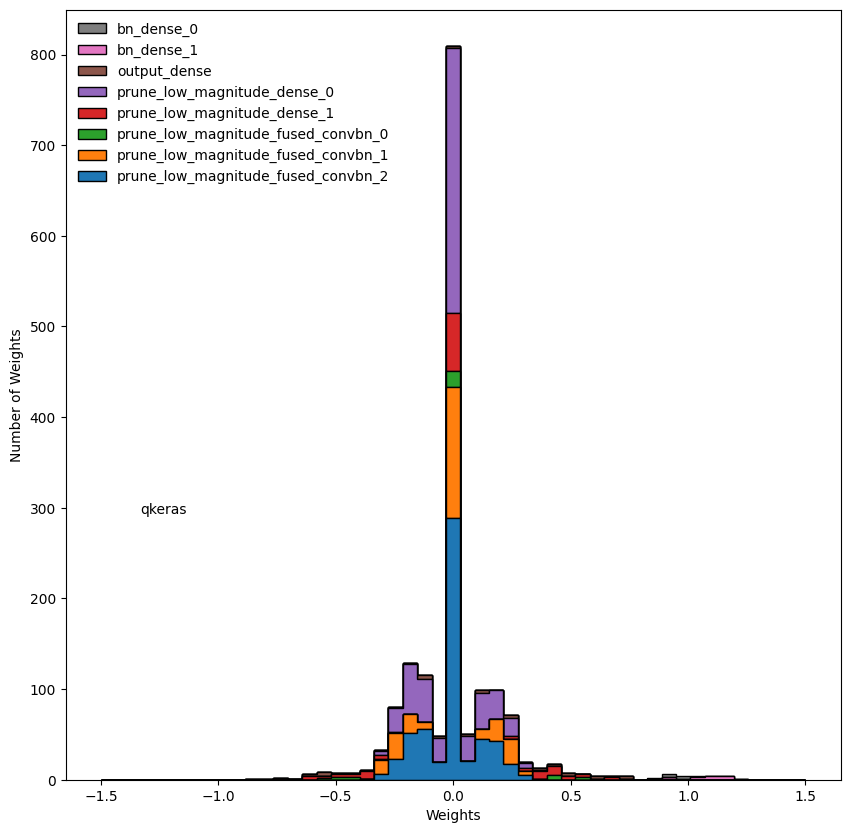

In [217]:
def doWeights(model):
    allWeightsByLayer = {}
    for layer in model.layers:
        if (layer._name).find("batch") != -1 or len(layer.get_weights()) < 1:
            continue
        weights = layer.weights[0].numpy().flatten()
        allWeightsByLayer[layer._name] = weights
        print('Layer {}: % of zeros = {}'.format(layer._name, np.sum(weights == 0) / np.size(weights)))

    labelsW = []
    histosW = []

    for key in reversed(sorted(allWeightsByLayer.keys())):
        labelsW.append(key)
        histosW.append(allWeightsByLayer[key])

    fig = plt.figure(figsize=(10, 10))
    bins = np.linspace(-1.5, 1.5, 50)
    plt.hist(histosW, bins, histtype='stepfilled', stacked=True, label=labelsW, edgecolor='black')
    plt.legend(frameon=False, loc='upper left')
    plt.ylabel('Number of Weights')
    plt.xlabel('Weights')
    plt.figtext(0.2, 0.38, model._name, wrap=True, horizontalalignment='left', verticalalignment='center')


doWeights(model_pruned)
doWeights(qmodel_pruned)

We see that 50% of the weights per layer are set to zero, as expected. Now, let's synthesize the floating point Keras model and the QKeras quantized model!

# CNNs in hls4ml

In this part, we will take the two models we trained above (the floating-point 32 Keras model and the 6-bit QKeras model), and synthesize them with hls4ml. Although your models are probably already in memory, let's load them from scratch. We need to pass the appropriate custom QKeras/pruning layers when loading, and remove the pruning parameters that were saved together with the model.

In [54]:
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper

from qkeras.utils import _add_supported_quantized_objects

co = {}
_add_supported_quantized_objects(co)
co['PruneLowMagnitude'] = pruning_wrapper.PruneLowMagnitude

model = tf.keras.models.load_model('./xray_pruned_cnn.h5', custom_objects=co)
model = strip_pruning(model)

qmodel = tf.keras.models.load_model('./xray_quant_pruned_cnn.h5', custom_objects=co)
qmodel = strip_pruning(qmodel)

Now, we need to define the hls4ml and Vivado configurations. Two things will change with respect to what was done in the previous exercises. First, we will use IOType= 'io_stream' in the Vivado configuration.

**You must use IOType= 'io_stream' if attempting to synthesize a large convolutional neural network.**

The CNN implementation in hls4ml is based on streams, which are synthesized in hardware as first in, first out (FIFO) buffers. Shift registers are used to keep track of the last <kernel height - 1> rows of input pixels, and maintains a shifting snapshot of the convolution kernel.

This is illustrated in the gif below. Here, the input image is at the top-left and the output image at the bottom left. The top right image shows the internal state of the shift registers and convolutional kernel. The red square indicates the current pixels contained within the convolutional kernel.

<img src="conv2d_animation.gif" width="550" align="center">

Lastly, we will use ['Strategy'] = 'Latency' for all the layers in the hls4ml configuration. If one layer would have >4096 elements, we sould set ['Strategy'] = 'Resource' for that layer, or increase the reuse factor by hand. You can find examples of how to do this below.

In [57]:
import hls4ml
import plotting

# First, the baseline model
hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name')

# Set the precision and reuse factor for the full model
hls_config['Model']['Precision'] = 'ap_fixed<16,6>'
hls_config['Model']['ReuseFactor'] = 16

# Create an entry for each layer, here you can for instance change the strategy for a layer to 'resource'
# or increase the reuse factor individually for large layers.
# In this case, we designed the model to be small enough for a fully parallel implementation
# so we use the latency strategy and reuse factor of 1 for all layers.
for Layer in hls_config['LayerName'].keys():
    hls_config['LayerName'][Layer]['Strategy'] = 'latency'
    hls_config['LayerName'][Layer]['ReuseFactor'] = 16
    hls_config['LayerName'][Layer]['Precision'] = 'ap_fixed<16,6>'

hls_config['LayerName']['input_1']['Precision'] = "ap_uint<8>"
# If you want best numerical performance for high-accuray models, while the default latency strategy is faster but numerically more unstable
hls_config['LayerName']['output_softmax']['Strategy'] = 'Stable'
plotting.print_dict(hls_config)

cfg = hls4ml.converters.create_config(backend='VivadoAccelerator')
cfg['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg['HLSConfig'] = hls_config
cfg['KerasModel'] = model
cfg['OutputDir'] = './xray_pruned_cnn_16_6_16Latency/'
cfg['board']='pynq-z2'

hls_model = hls4ml.converters.keras_to_hls(cfg)
hls_model.compile()


Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 128, 128, 1]], output shape: [None, 128, 128, 1]
Layer name: conv_0, layer type: Conv2D, input shapes: [[None, 128, 128, 1]], output shape: [None, 126, 126, 4]
Layer name: bn_conv_0, layer type: BatchNormalization, input shapes: [[None, 126, 126, 4]], output shape: [None, 126, 126, 4]
Layer name: conv_act_0, layer type: Activation, input shapes: [[None, 126, 126, 4]], output shape: [None, 126, 126, 4]
Layer name: pool_0, layer type: MaxPooling2D, input shapes: [[None, 126, 126, 4]], output shape: [None, 42, 42, 4]
Layer name: conv_1, layer type: Conv2D, input shapes: [[None, 42, 42, 4]], output shape: [None, 40, 40, 8]
Layer name: bn_conv_1, layer type: BatchNormalization, input shapes: [[None, 40, 40, 8]], output shape: [None, 40, 40, 8]
Layer name: conv_act_1, layer type: Activation, input shapes: [[None, 40, 40, 8]], output shape: [None, 40, 40, 8]
Layer name: pool_1, layer type: MaxPooli

Done


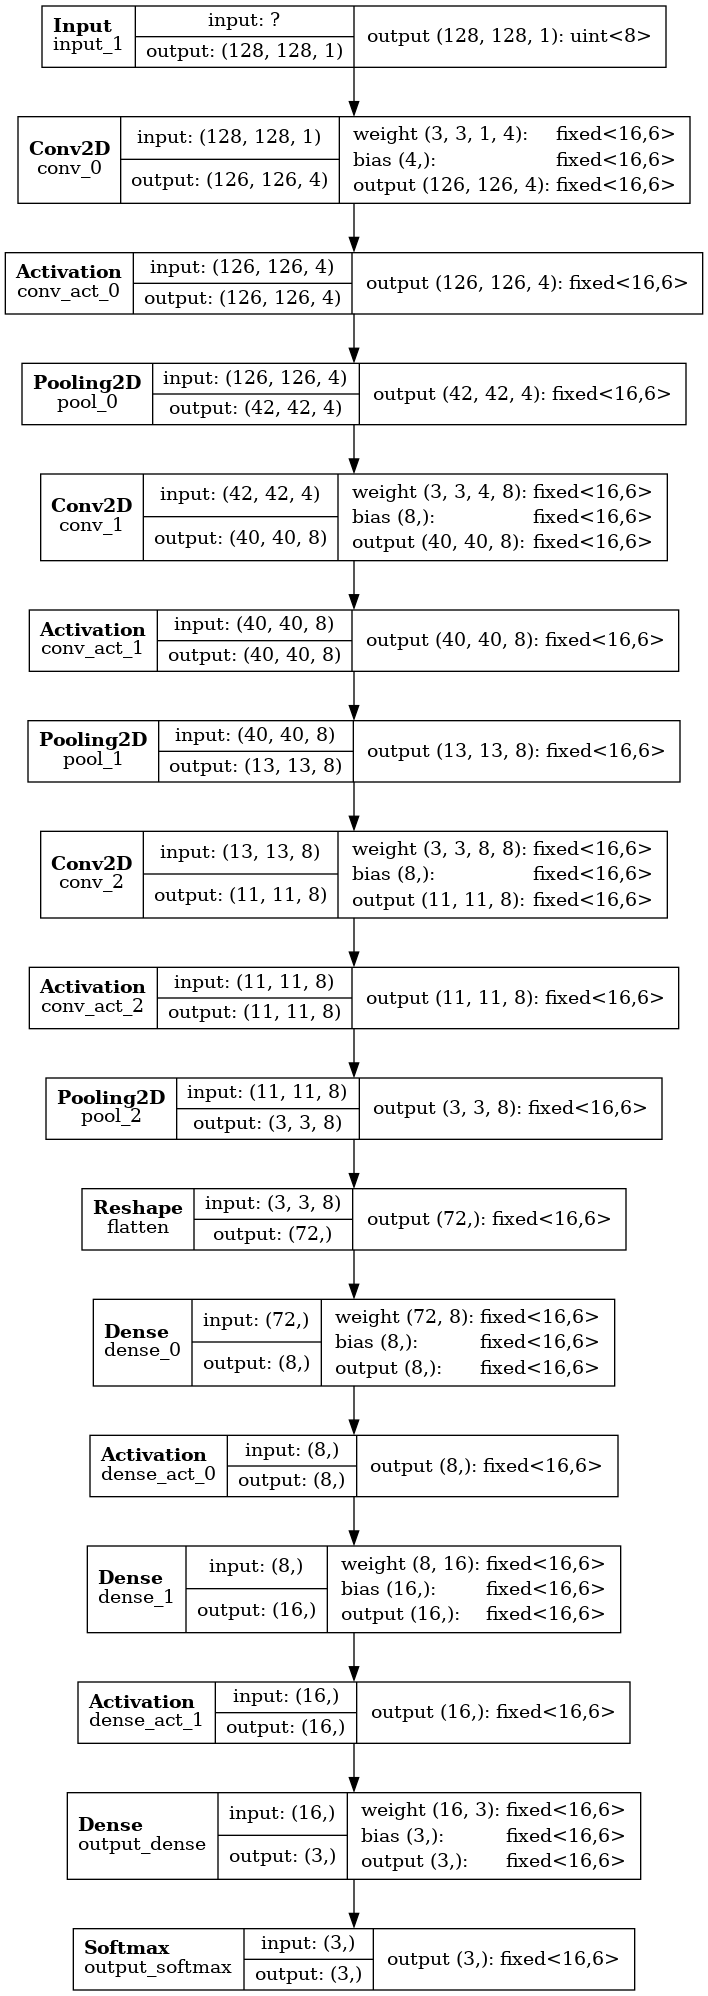

In [56]:
#Model Arch
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 128, 128, 1]], output shape: [None, 128, 128, 1]
Layer name: conv_0, layer type: Conv2D, input shapes: [[None, 128, 128, 1]], output shape: [None, 126, 126, 4]
Layer name: bn_conv_0, layer type: BatchNormalization, input shapes: [[None, 126, 126, 4]], output shape: [None, 126, 126, 4]
Layer name: conv_act_0, layer type: Activation, input shapes: [[None, 126, 126, 4]], output shape: [None, 126, 126, 4]
Layer name: pool_0, layer type: MaxPooling2D, input shapes: [[None, 126, 126, 4]], output shape: [None, 42, 42, 4]
Layer name: conv_1, layer type: Conv2D, input shapes: [[None, 42, 42, 4]], output shape: [None, 40, 40, 8]
Layer name: bn_conv_1, layer type: BatchNormalization, input shapes: [[None, 40, 40, 8]], output shape: [None, 40, 40, 8]
Layer name: conv_act_1, layer type: Activation, input shapes: [[None, 40, 40, 8]], output shape: [None, 40, 40, 8]
Layer name: pool_1, layer type: MaxPooli

(<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 None,
 None)

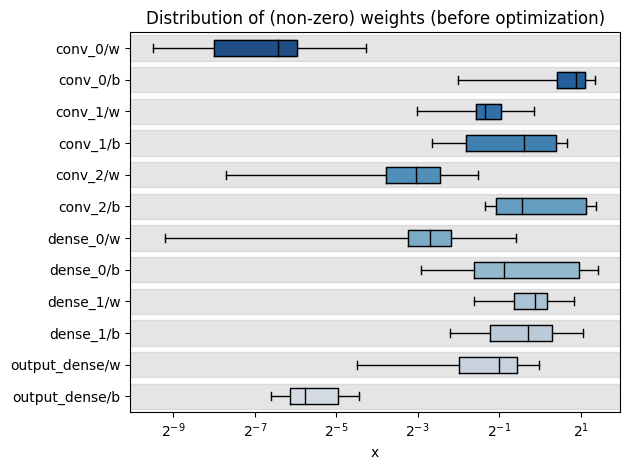

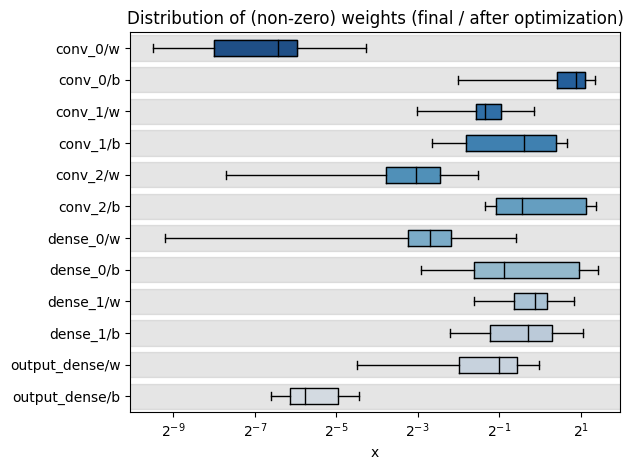

In [75]:
hls4ml.model.profiling.numerical(model=model, hls_model=hls_model)

In [40]:
# Then the QKeras model
hls_config_q = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
hls_config_q['Model']['ReuseFactor'] = 512
hls_config_q['Model']['Precision'] = 'ap_fixed<16,6>'


for Layer in hls_config_q['LayerName'].keys():
    hls_config_q['LayerName'][Layer]['Strategy'] = 'latency'
    hls_config_q['LayerName'][Layer]['ReuseFactor'] = 512
    hls_config_q['LayerName'][Layer]['Precision'] = 'ap_fixed<24,8>'

hls_config_q['LayerName']['input_3']['Precision'] = "ap_uint<8>"

hls_config_q['LayerName']['output_softmax']['Strategy'] = 'Stable'
plotting.print_dict(hls_config_q)

cfg_q = hls4ml.converters.create_config(backend='VivadoAccelerator')
cfg_q['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg_q['HLSConfig'] = hls_config_q
cfg_q['KerasModel'] = qmodel
cfg_q['OutputDir'] = './xray_quantized_pruned_cnn/'
cfg_q['board']='pynq-z2'

hls_model_q = hls4ml.converters.keras_to_hls(cfg_q)
hls_model_q.compile()

Interpreting Model
Topology:
Layer name: input_3, layer type: InputLayer, input shapes: [[None, 128, 128, 1]], output shape: [None, 128, 128, 1]
Layer name: fused_convbn_0, layer type: QConv2DBatchnorm, input shapes: [[None, 128, 128, 1]], output shape: [None, 126, 126, 4]
Layer name: conv_act_0, layer type: Activation, input shapes: [[None, 126, 126, 4]], output shape: [None, 126, 126, 4]
Layer name: pool_0, layer type: MaxPooling2D, input shapes: [[None, 126, 126, 4]], output shape: [None, 42, 42, 4]
Layer name: fused_convbn_1, layer type: QConv2DBatchnorm, input shapes: [[None, 42, 42, 4]], output shape: [None, 40, 40, 8]
Layer name: conv_act_1, layer type: Activation, input shapes: [[None, 40, 40, 8]], output shape: [None, 40, 40, 8]
Layer name: pool_1, layer type: MaxPooling2D, input shapes: [[None, 40, 40, 8]], output shape: [None, 13, 13, 8]
Layer name: fused_convbn_2, layer type: QConv2DBatchnorm, input shapes: [[None, 13, 13, 8]], output shape: [None, 11, 11, 8]
Layer name: co

Done


Interpreting Model
Topology:
Layer name: input_3, layer type: InputLayer, input shapes: [[None, 128, 128, 1]], output shape: [None, 128, 128, 1]
Layer name: fused_convbn_0, layer type: QConv2DBatchnorm, input shapes: [[None, 128, 128, 1]], output shape: [None, 126, 126, 4]
Layer name: conv_act_0, layer type: Activation, input shapes: [[None, 126, 126, 4]], output shape: [None, 126, 126, 4]
Layer name: pool_0, layer type: MaxPooling2D, input shapes: [[None, 126, 126, 4]], output shape: [None, 42, 42, 4]
Layer name: fused_convbn_1, layer type: QConv2DBatchnorm, input shapes: [[None, 42, 42, 4]], output shape: [None, 40, 40, 8]
Layer name: conv_act_1, layer type: Activation, input shapes: [[None, 40, 40, 8]], output shape: [None, 40, 40, 8]
Layer name: pool_1, layer type: MaxPooling2D, input shapes: [[None, 40, 40, 8]], output shape: [None, 13, 13, 8]
Layer name: fused_convbn_2, layer type: QConv2DBatchnorm, input shapes: [[None, 13, 13, 8]], output shape: [None, 11, 11, 8]
Layer name: co

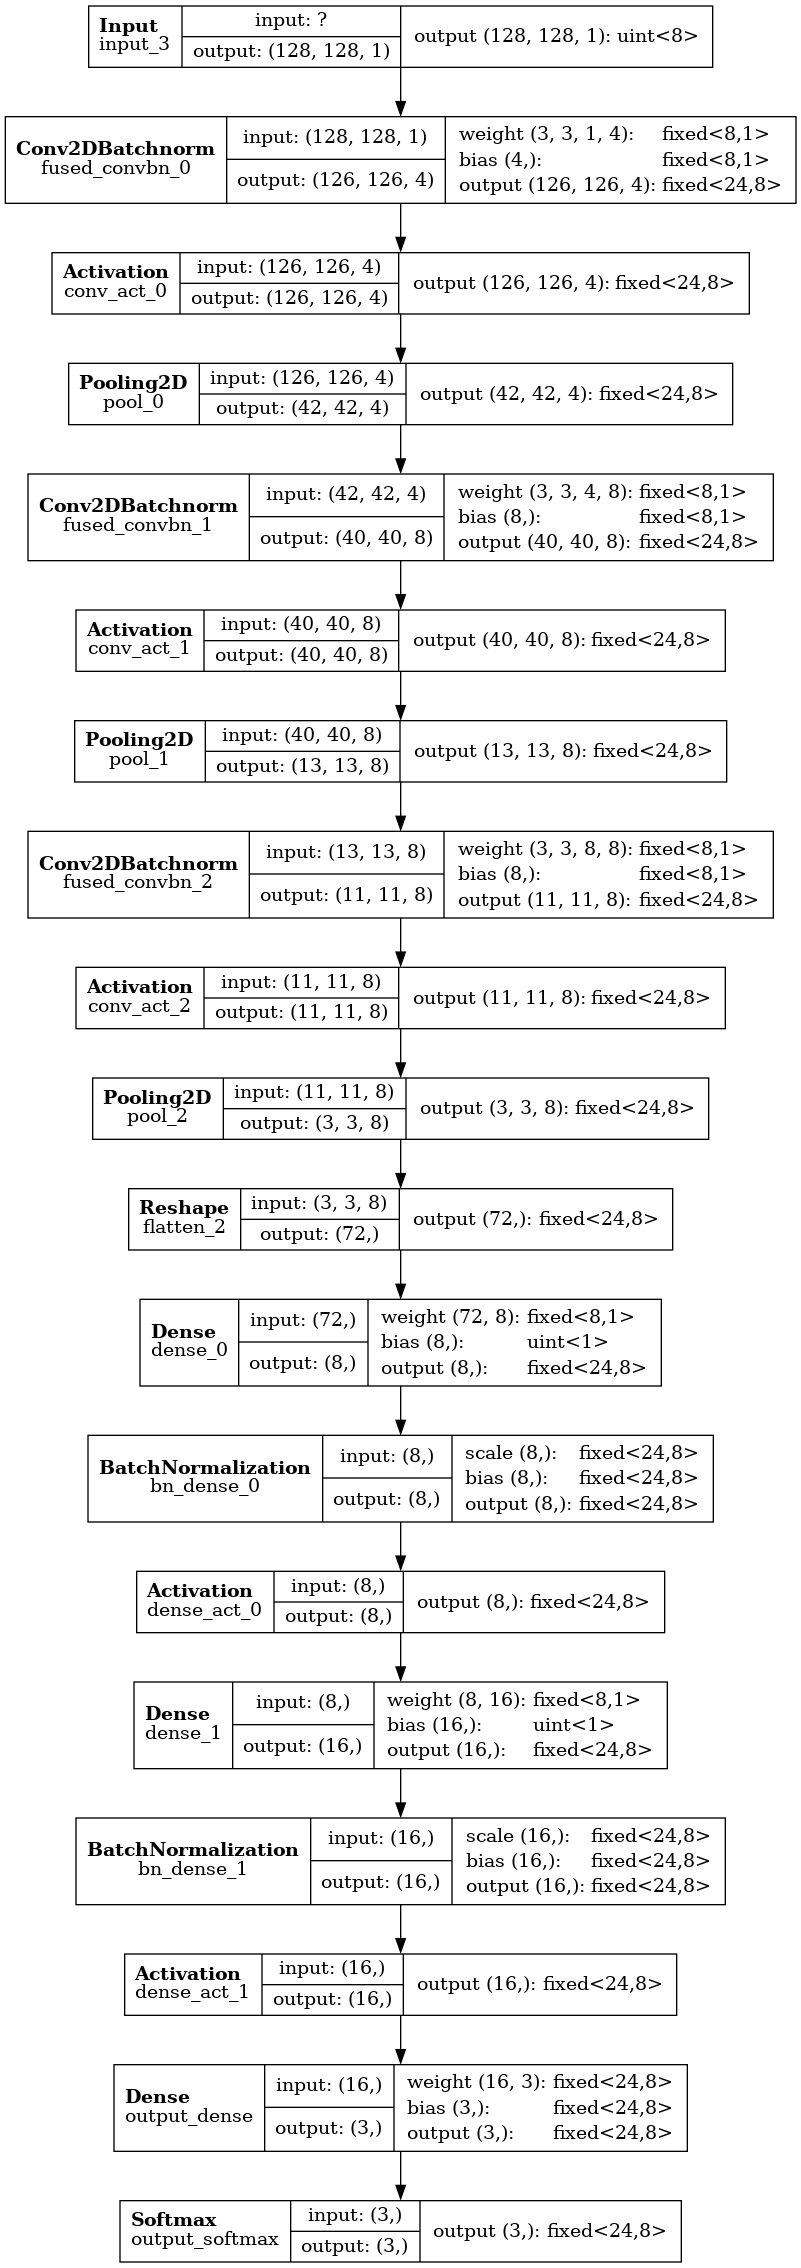

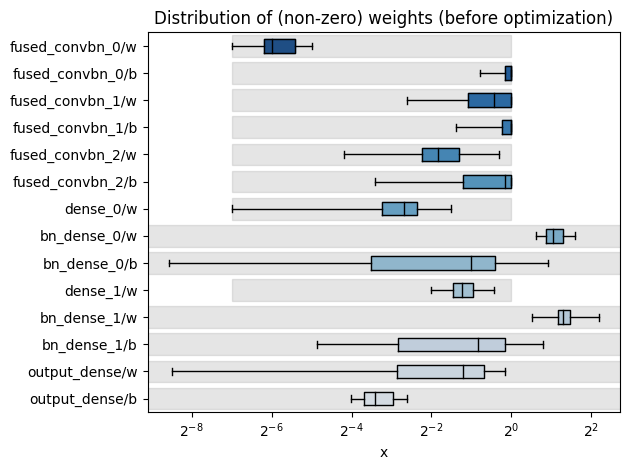

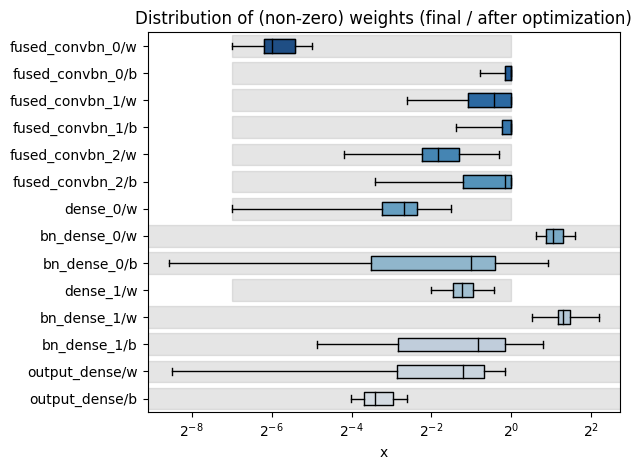

In [44]:
hls4ml.model.profiling.numerical(model=qmodel, hls_model=hls_model_q)
hls4ml.utils.plot_model(hls_model_q, show_shapes=True, show_precision=True, to_file=None)

In [47]:
X_test_reduced = x_test[:3000].reshape(422,128,128,1)
Y_test_reduced = y_test[:3000]
X_test_reduced = X_test_reduced.astype(float)
Y_test_reduced = Y_test_reduced.astype(float)
print(X_test_reduced.shape)

(422, 128, 128, 1)


In [37]:
import time

def current_milli_time():
    return round(time.time()*1000)
start = current_milli_time()    
y_predict = model.predict(x_test)
end = current_milli_time()
print(end-start)
y_predict_hls4ml = hls_model.predict(np.ascontiguousarray(x_test).astype(float)).astype(float)

14/14 [==============================] - 0s 7ms/step
142


In [42]:
y_predict_q = qmodel.predict(x_test)
y_predict_hls4ml_q = hls_model_q.predict(np.ascontiguousarray(x_test).astype(float)).astype(float)

14/14 [==============================] - 0s 20ms/step


In [44]:
# print(y_test_1h.shape)
# print(y_predict_q.shape)
# print(y_predict.shape)

np.save("./XRAY_x_test.npy",x_test.reshape(422,128,128,1))
np.save("./XRAY_y_test.npy",y_te_one_hot)
print(x_test.shape)

cnt=0
N=y_te_one_hot.shape[0]
for i in range(0,N):
    # print(f"{y_test_1h[i]} and Predicted {y_predict_hls4ml[i]}")
    # print(f"{np.argmax(y_test_1h[i])} and Predicted {np.argmax(y_predict[i])}")
    if(np.argmax(y_te_one_hot[i])!=np.argmax(y_predict_hls4ml[i])):
        # print("WRONG")
        cnt=cnt+1
print(cnt)
print(y_te_one_hot.shape[0])

(422, 128, 128)


NameError: name 'y_predict_hls4ml' is not defined

Accuracy Keras:  0.933649289099526
Accuracy hls4ml: 0.8838862559241706
Accuracy Keras:  0.8672985781990521
Accuracy hls4ml: 0.7488151658767772


/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/prabhav/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

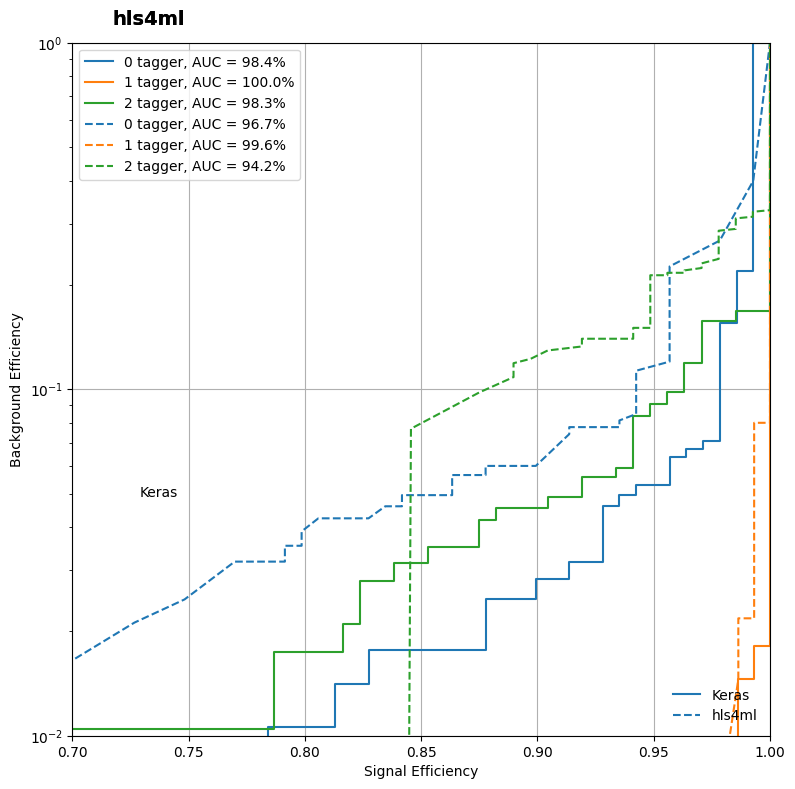

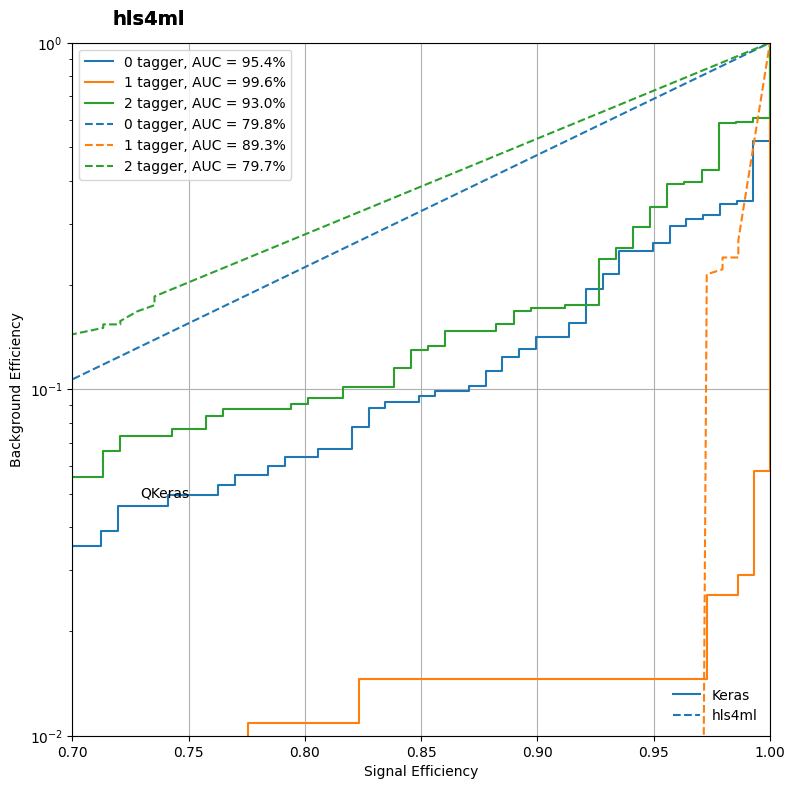

In [43]:
import plotting
from sklearn.metrics import accuracy_score


def plotROC(Y, y_pred, y_pred_hls4ml, label="Model"):
    accuracy_keras = float(accuracy_score(np.argmax(Y, axis=1), np.argmax(y_pred, axis=1)))
    accuracy_hls4ml = float(accuracy_score(np.argmax(Y, axis=1), np.argmax(y_pred_hls4ml, axis=1)))

    print("Accuracy Keras:  {}".format(accuracy_keras))
    print("Accuracy hls4ml: {}".format(accuracy_hls4ml))

    fig, ax = plt.subplots(figsize=(9, 9))
    _ = plotting.makeRoc(Y, y_pred, labels=['%i' % nr for nr in range(n_classes)])
    plt.gca().set_prop_cycle(None)  # reset the colors
    _ = plotting.makeRoc(Y, y_pred_hls4ml, labels=['%i' % nr for nr in range(n_classes)], linestyle='--')

    from matplotlib.lines import Line2D

    lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
    from matplotlib.legend import Legend

    leg = Legend(ax, lines, labels=['Keras', 'hls4ml'], loc='lower right', frameon=False)
    ax.add_artist(leg)
    plt.figtext(0.2, 0.38, label, wrap=True, horizontalalignment='left', verticalalignment='center')
    plt.ylim(0.01, 1.0)
    plt.xlim(0.7, 1.0)

# y_test_1h  = np.zeros((np.array(Y_test_reduced).shape[0],3))

# Plot the pruned floating point model:
plotROC(y_te_one_hot, y_predict, y_predict_hls4ml, label="Keras")

# Plot the pruned and quantized QKeras model
plotROC(y_te_one_hot, y_predict_q, y_predict_hls4ml_q, label="QKeras")


In [58]:
import os

# os.environ['PATH'] = os.environ['XILINX_VIVADO'] + '/bin:' + os.environ['PATH']

synth = True  # Only if you want to synthesize the models yourself (>1h per model) rather than look at the provided reports.
if synth:
    hls_model.build(csim=False,export=True, bitfile=True)
    # hls_model_q.build(csim=False, export=True, bitfile=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/prabhav/Xilinx/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/prabhav/Xilinx/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'prabhav' on host 'zephy' (Linux_x86_64 version 5.15.0-83-generic) on Wed Dec 11 19:24:07 IST 2019
INFO: [HLS 200-10] On os Ubuntu 20.04.6 LTS
INFO: [HLS 200-10] In directory '/home/prabhav/Desktop/pyzynq/hls4ml-tutorial/xray_pruned_cnn_16_6_16Latency'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/prabhav/Desktop/pyzynq/hls4ml-tutorial/xray_pruned_cnn_16_6_16Latency/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject_axi.cpp' to the project
INFO: [HLS 200-10] Addin